<a href="https://colab.research.google.com/github/liliakurghinyan/used-cars-project/blob/main/used_car_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
%matplotlib inline

df = pd.read_csv('/content/used_car_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [51]:
df.head(199)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
194,Toyota,Etios,2012,12,"135,000 km",Manual,second,Diesel,Nov-24,Toyota Etios 2012 Diesel Good Condition,"₹ 3,95,000"
195,Volkswagen,VentoTest,2019,5,"160,000 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 1.5 TDI Highline Plus, 2019, ...","₹ 6,95,000"
196,Tata,Harrier,2022,2,"14,000 km",Automatic,first,Diesel,Oct-24,Tata Harrier 2022 Diesel 14000 Km Driven,"₹ 18,75,000"
197,Kia,Seltos,2020,4,"50,200 km",Automatic,first,Petrol,Nov-24,Kia Seltos 2020 Petrol Well Maintained,"₹ 13,00,000"


In [52]:
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


let's see if there are any missing values in dataset


In [53]:
df.isnull().any()

,0
Brand,False
model,False
Year,False
Age,False
kmDriven,True
Transmission,False
Owner,False
FuelType,False
PostedDate,False
AdditionInfo,False


In [54]:
df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,47
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


In [55]:
#getting rid of unnessecary simbols from tha data, and converting it to numeric

In [56]:
df['kmDriven'] = df['kmDriven'].str.replace('km','')
df['kmDriven'] = df['kmDriven'].str.replace(',','')
df['kmDriven'] = pd.to_numeric(df['kmDriven'],errors = 'coerce')


In [57]:
df['kmDriven'].dtype

dtype('float64')

there is only one column that has null values, the column of kmDriven

In [58]:
df[df['kmDriven'].isnull()]

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
231,Maruti Suzuki,Alto-800,2019,5,NaN,Manual,first,Petrol,Nov-24,Maruti Suzuki Alto 800,"₹ 3,00,000"
353,Toyota,Innova,2016,8,NaN,Manual,second,Diesel,Nov-24,Toyota Innova 2016 model Diesel,"₹ 8,60,000"
444,Honda,City ZX,2024,0,NaN,Automatic,first,Petrol,Nov-24,Honda City,"₹ 15,50,000"
476,Hyundai,Santro Xing,2010,14,NaN,Automatic,second,Petrol,Nov-24,Hyundai Santro Xing 2010,"₹ 1,20,000"
608,Toyota,Etios,2012,12,NaN,Manual,second,Diesel,Nov-24,Toyota Etios Diesel Good Condition,"₹ 3,30,000"
793,Skoda,Kushaq,2010,14,NaN,Automatic,first,Petrol,Nov-24,"Car will have perfect condition,negotiation ar...","₹ 4,00,000"
976,Mahindra,Bolero Neo Plus,2015,9,NaN,Automatic,first,Diesel,Nov-24,Mahindra Bolero Neo Plus 2015,"₹ 4,50,000"
1164,Mahindra,Bolero Neo,2023,1,NaN,Manual,first,Diesel,Nov-24,Mahindra Bolero Neo 2023 Diesel,"₹ 10,00,000"
1199,Tata,Indica,2014,10,NaN,Manual,first,Diesel,Nov-24,Good running,"₹ 2,50,000"
1413,Hyundai,Santro Xing,2007,17,NaN,Manual,second,Petrol,Nov-24,Hyundai Santro Xing 2007 Petrol Good Condition,"₹ 1,48,000"


In [59]:
median_km = df['kmDriven'].median()
df.fillna({'kmDriven': median_km}, inplace=True)
df['kmDriven'].isnull().sum()

0

Use median if the data is skewed

In [60]:
df.describe()


,Year,Age,kmDriven
count,9582.000000,9582.000000,9582.000000
mean,2016.361094,7.638906,70578.394385
std,4.087226,4.087226,56171.679928
min,1986.000000,0.000000,0.000000
25%,2014.000000,5.000000,43376.750000
50%,2017.000000,7.000000,65000.000000
75%,2019.000000,10.000000,86000.000000
max,2024.000000,38.000000,980002.000000


let's modify the price column, convert it to dollars, (november 28, 2024,10:46 PM) 1₹ = 0.012 $

In [61]:
df['AskPrice'] = df['AskPrice'].str.replace('₹','')
df['AskPrice'] = df['AskPrice'].str.replace(',','')
df['AskPrice'] = pd.to_numeric(df['AskPrice'],errors = 'coerce')
df['AskPrice$'] = df['AskPrice'] * 0.012
df['AskPrice$']

,AskPrice$
0,2340.000
1,4500.000
2,2219.988
3,6780.000
4,8220.000
...,...
9577,12480.000
9578,4500.000
9579,4980.000
9580,10260.000


In [62]:
#let's drop the 'AskPrice' column

In [63]:
df.drop('AskPrice', axis=1, inplace=True)

In [64]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice$
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...",2340.000
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",4500.000
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",2219.988
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,6780.000
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",8220.000


In [65]:
df['PostedDate']=df['PostedDate'].str.replace('-',' ')

In [66]:
df['PostedDate']

,PostedDate
0,Nov 24
1,Jul 24
2,Nov 24
3,Nov 24
4,Nov 24
...,...
9577,Oct 24
9578,Nov 24
9579,Nov 24
9580,Oct 24


In [67]:
df['PostedDate'] = pd.to_datetime(df['PostedDate'], format='%b %d')
df['PostedDate']

,PostedDate
0,1900-11-24
1,1900-07-24
2,1900-11-24
3,1900-11-24
4,1900-11-24
...,...
9577,1900-10-24
9578,1900-11-24
9579,1900-11-24
9580,1900-10-24


In [68]:
df['PostedDate'] = df['PostedDate'].apply(lambda x: x.replace(year=2024))
df['PostedDate']

,PostedDate
0,2024-11-24
1,2024-07-24
2,2024-11-24
3,2024-11-24
4,2024-11-24
...,...
9577,2024-10-24
9578,2024-11-24
9579,2024-11-24
9580,2024-10-24


In [69]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice$
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,2024-11-24,"Honda City v teck in mint condition, valid gen...",2340.000
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,2024-07-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",4500.000
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,2024-11-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",2219.988
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,2024-11-24,Maruti Suzuki Swift 2017 Diesel Good Condition,6780.000
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,2024-11-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",8220.000


Now let's start our Exploratory Data Analysis

I want to add a feature called 'krug', let's see how many 'krug's has car done

In [70]:
df['HundredThousandKM'] = df['kmDriven'] / 100000
df['HundredThousandKM'] = df['HundredThousandKM'].round(2)
df['HundredThousandKM']

,HundredThousandKM
0,0.98
1,1.90
2,0.77
3,0.84
4,0.45
...,...
9577,1.06
9578,0.55
9579,0.92
9580,0.72


In [71]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice$,HundredThousandKM
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,2024-11-24,"Honda City v teck in mint condition, valid gen...",2340.000,0.98
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,2024-07-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",4500.000,1.90
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,2024-11-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",2219.988,0.77
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,2024-11-24,Maruti Suzuki Swift 2017 Diesel Good Condition,6780.000,0.84
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,2024-11-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",8220.000,0.45


**Distribution of Car Brands**
Use a bar chart to see which brands dominate the dataset.

### 1. Univariate **Analysis**

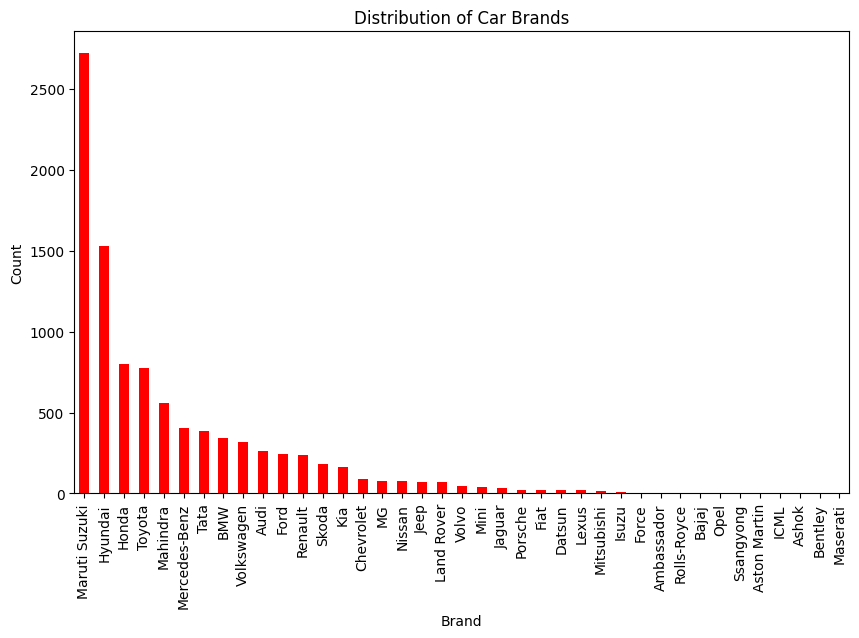

In [72]:
df['Brand'].value_counts().plot(kind = 'bar', figsize= (10,6), color = 'red')
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

**Distribution of Kilometers Driven**
Use a histogram or KDE plot to check the spread of mileage (kmDriven)

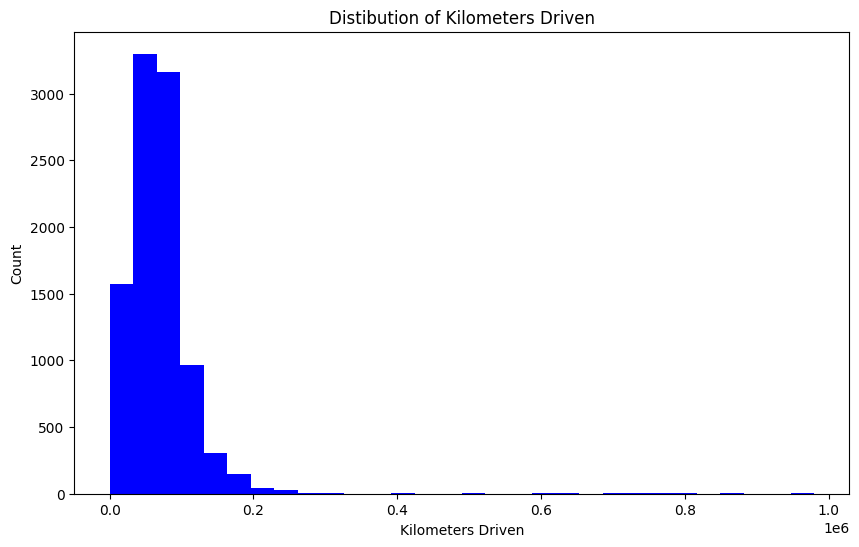

In [73]:
df['kmDriven'].plot(kind = 'hist',bins = 30, figsize = (10,6), color = 'blue')
plt.title('Distibution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()

**Fuel Type Composition**
Create a pie chart to analyze the proportion of cars by fuel type:

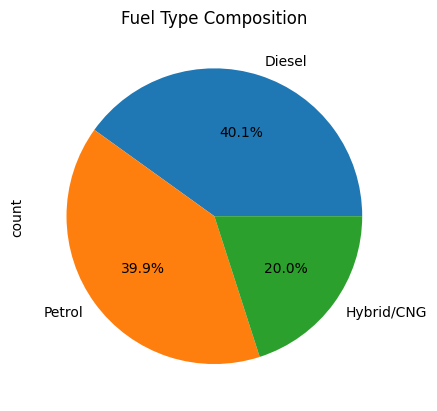

In [74]:
df['FuelType'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Fuel Type Composition')
plt.show()

# **Bivariate Analysis**

Objective: Understand relationships between two variables.

Car Age vs. Ask Price
Scatter plot to see how car age affects the price:

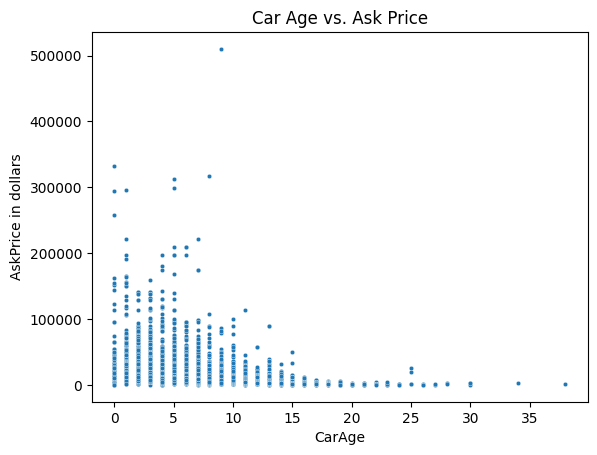

In [75]:
sns.scatterplot(x='Age', y='AskPrice$', data=df, s=10)
plt.title('Car Age vs. Ask Price')
plt.xlabel('CarAge')
plt.ylabel('AskPrice in dollars')
plt.show()

Brand vs. Average Price
Bar chart to compare the average price of cars across brands:

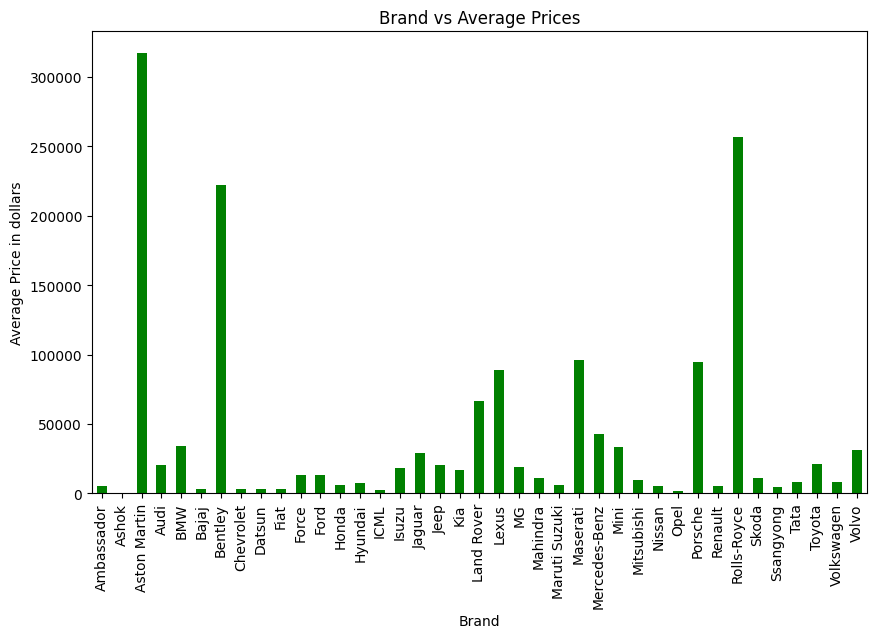

In [76]:
df.groupby('Brand')['AskPrice$'].mean().plot(kind = 'bar', figsize = (10,6), color = 'green')
plt.title('Brand vs Average Prices')
plt.xlabel('Brand')
plt.ylabel('Average Price in dollars')
plt.show()

In [77]:
df.groupby('Brand')['AskPrice$'].mean().nlargest(3)

,AskPrice$
Brand,
Aston Martin,316800.0
Rolls-Royce,256410.0
Bentley,222000.0


In [78]:
df[df['Brand'] == 'Aston Martin']

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice$,HundredThousandKM
331,Aston Martin,Vanquish,2016,8,25700.0,Automatic,first,Petrol,2024-11-24,"Aston Martin Vanquish 6.0 V12, 2016, Petrol",316800.0,0.26


Fuel Type vs. Ask Price
Boxplot to analyze price distribution across fuel types


Text(0, 0.5, 'Ask Price in dollars')

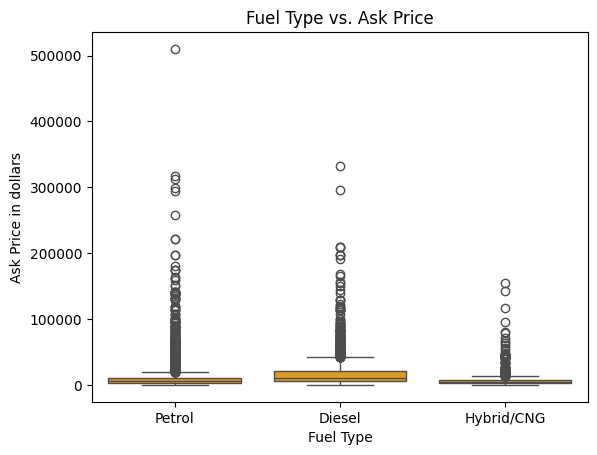

In [79]:
sns.boxplot(x='FuelType', y='AskPrice$', data=df, color = 'orange')
plt.title('Fuel Type vs. Ask Price')
plt.xlabel('Fuel Type')
plt.ylabel('Ask Price in dollars')

**Transmission Type vs. Ask Price**
Compare price trends for manual and automatic cars using a violin plot:

Text(0, 0.5, 'Ask Price in dollars')

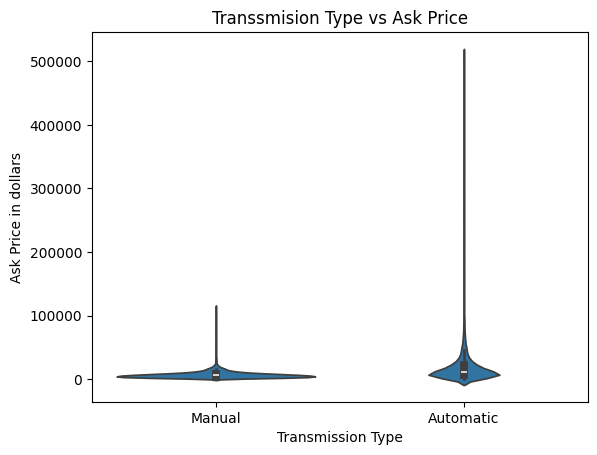

In [80]:
sns.violinplot(x='Transmission', y = 'AskPrice$', data= df)
plt.title('Transsmision Type vs Ask Price')
plt.xlabel('Transmission Type')
plt.ylabel('Ask Price in dollars')

# **Multivariate Analysis**

**Objective: Explore relationships involving more than two variables.**

Age, Fuel Type, and Price
Use a grouped boxplot to see how price varies with age and fuel type: NOT WORKING

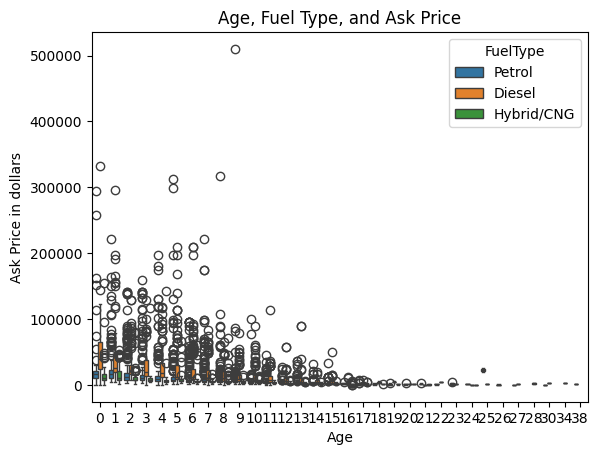

In [81]:
sns.boxplot(x='Age', y='AskPrice$', hue='FuelType', data=df)
plt.title('Age, Fuel Type, and Ask Price')
plt.xlabel('Age')
plt.ylabel('Ask Price in dollars')
plt.show()

Heatmap for Correlation Matrix
Visualize relationships between numeric columns like kmDriven, Age, and AskPrice:


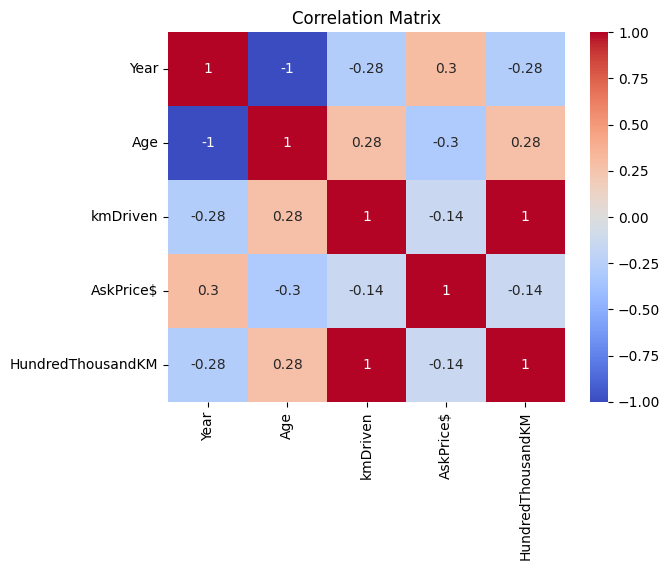

In [82]:
numerical_features = df.select_dtypes(include =np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Mileage in 100k km vs. Price by Transmission
Use a scatter plot with hue for transmission type:

Text(0.5, 0, 'Mileage in 100k km')

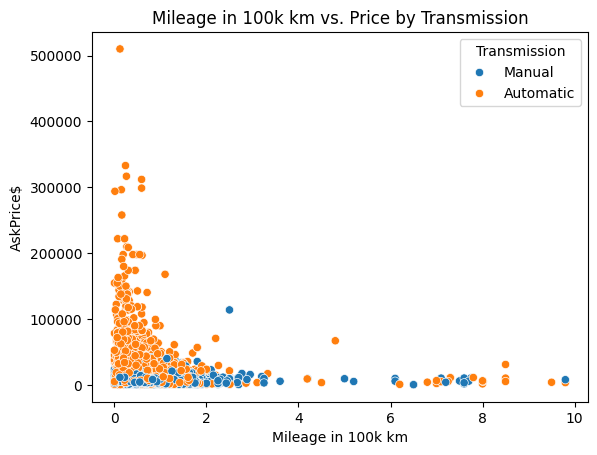

In [83]:
sns.scatterplot(x='HundredThousandKM', y='AskPrice$', hue='Transmission', data=df)
plt.title('Mileage in 100k km vs. Price by Transmission')
plt.xlabel('Mileage in 100k km')

# **Time-Based Analysis**

**Objective: Analyze trends over time using the PostedDate column.**

Number of Listings Over Time
Create a line plot to see the frequency of listings by date

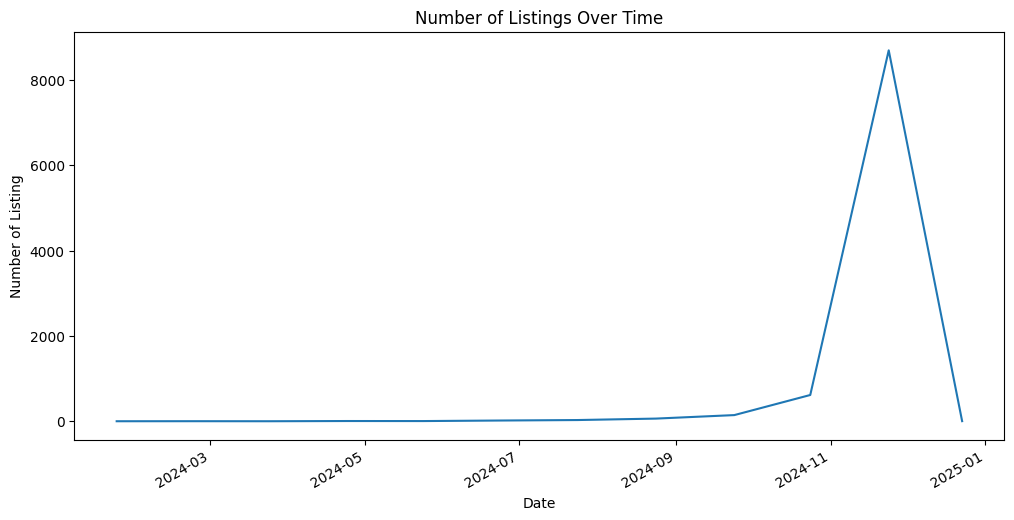

In [84]:
listings_over_time = df.groupby('PostedDate')['Brand'].count()
listings_over_time.plot(kind = 'line', figsize = (12,6), title='Number of Listings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listing')
plt.show()

Price Trends Over Time
Plot the average price of cars over time:

<Axes: title={'center': 'Average Price Over Time'}, xlabel='PostedDate'>

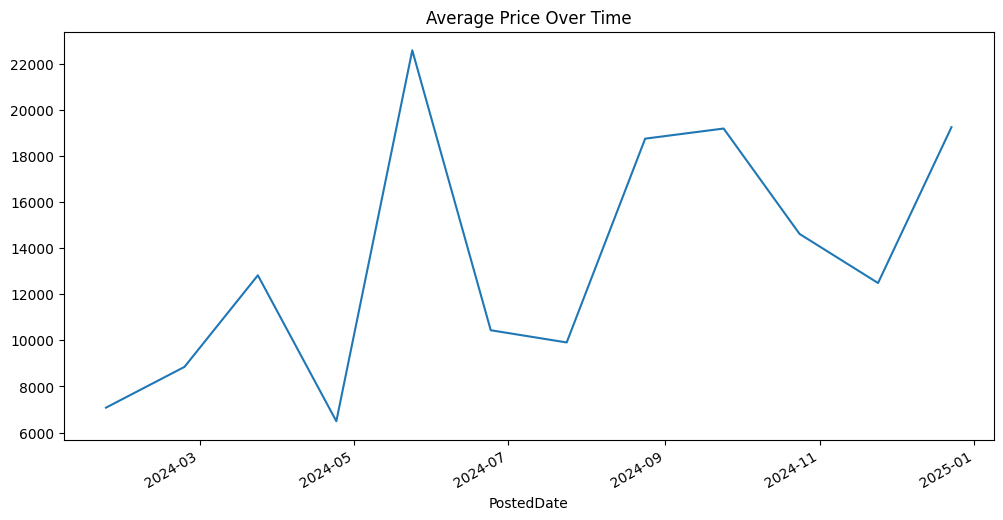

In [85]:
df.groupby('PostedDate')['AskPrice$'].mean().plot(kind='line', figsize=(12, 6), title='Average Price Over Time')


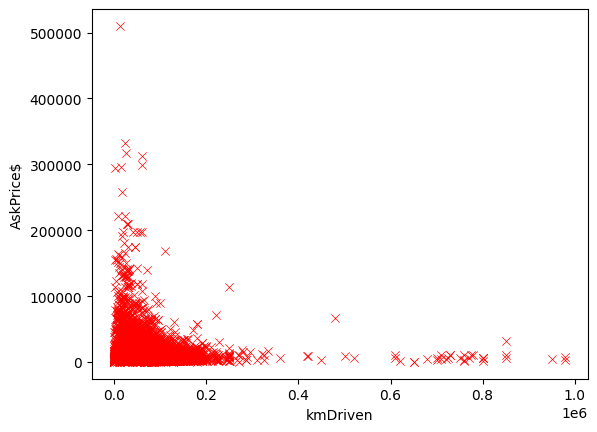

In [86]:
sns.scatterplot(x=df['kmDriven'], y=df['AskPrice$'],marker='x', color='r')
plt.show()

# **Machine Learning**

Decision Tree Regression

In [91]:
x = df[['kmDriven']]
y = df['AskPrice$']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [92]:
#initilize the model
model = DecisionTreeRegressor(random_state=42)

#train the model
model.fit(x_train,y_train)

#predict on a test data
y_pred = model.predict(x_test)

#evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 475946463.19992787
R-squared: -0.23302449623493682


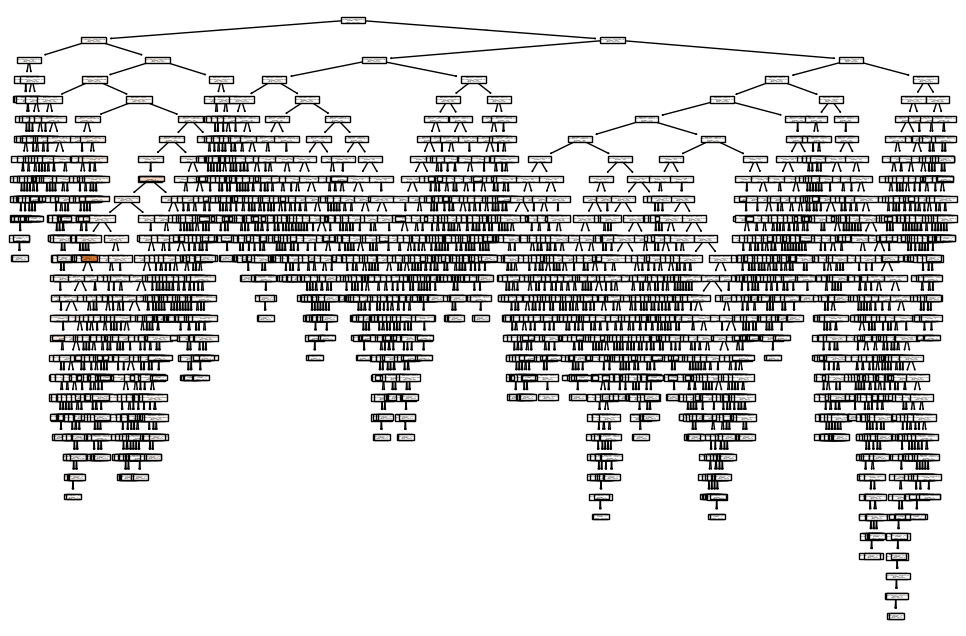

In [95]:
plt.figure(figsize=(12,8))
plot_tree(model,feature_names=['kmDriven'], filled=True)
plt.show()

In [100]:
# Example: User input
user_km = float(input("Enter the km driven: "))
user_input = np.array([[user_km]])

predicted_price = model.predict(user_input)
print(f"The predicted AskPrice is: {predicted_price[0]}")


Enter the km driven: 97000
The predicted AskPrice is: 10464.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
